In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data loading
data = pd.read_csv('scaler_apollo_hospitals.csv')
data.shape

(1338, 8)

In [5]:
# droping duplicate column
data.drop(columns=data.columns[0],inplace=True)

In [6]:
data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [7]:
data.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [8]:
#description of data
data.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [9]:
data.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

In [10]:
#missing values
data.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [15]:
#outlier treatment for hospitalization charges
purchase_h=data['hospitalization charges']
qm1=np.quantile(purchase_h,0.25)
qm3=np.quantile(purchase_h,0.75)
iqrm=qm3-qm1
upper_bound_m=qm3+(1.5*iqrm)
lower_bound_m=qm1-(1.5*iqrm)
data=data[data['hospitalization charges']>lower_bound_m]
data=data[data['hospitalization charges']<upper_bound_m]
data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

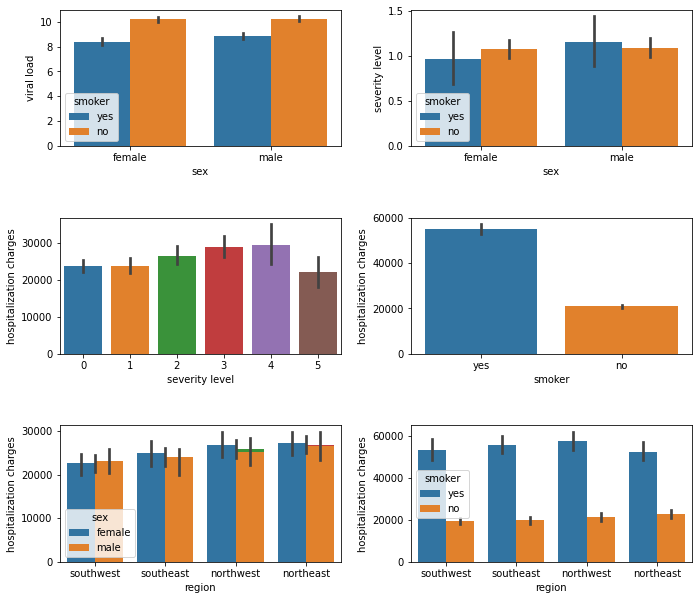

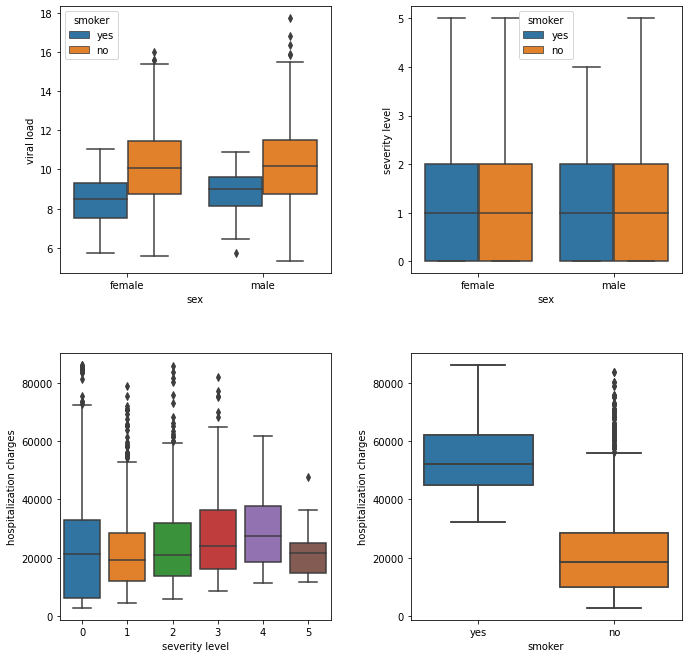

In [16]:
# Visual Analysis of data 
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)
sns.barplot(x='sex', y='viral load', data=data, ax=axes[0,0],hue=data['smoker'])
sns.barplot(x='sex', y='severity level', data=data, ax=axes[0,1],hue=data['smoker'])
sns.barplot(x='severity level', y='hospitalization charges', data=data, ax=axes[1,0])
sns.barplot(x='smoker', y='hospitalization charges', data=data, ax=axes[1,1])
sns.barplot(x='region', y='hospitalization charges', data=data, ax=axes[2,0])
sns.barplot(x='region', y='hospitalization charges', data=data, ax=axes[2,0],hue=data['sex'])
sns.barplot(x='region', y='hospitalization charges', data=data, ax=axes[2,1],hue=data['smoker'])

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='sex', y='viral load', data=data, ax=axes[0,0],hue=data['smoker'])
sns.boxplot(x='sex', y='severity level', data=data, ax=axes[0,1],hue=data['smoker'])
sns.boxplot(x='severity level', y='hospitalization charges', data=data, ax=axes[1,0])
sns.boxplot(x='smoker', y='hospitalization charges', data=data, ax=axes[1,1])
sns.boxplot(x='smoker', y='hospitalization charges', data=data, ax=axes[1,1])

<AxesSubplot:>

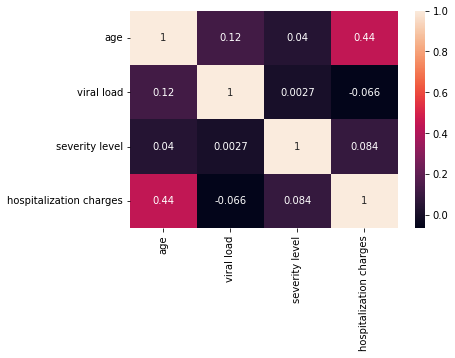

In [58]:
sns.heatmap(
    data.corr(),
    annot=True
)

### Hospitalization of people who do smoking is greater than those who don't

In [28]:
# Specify the samples which needs to be used for given hypothesis
var1 = data[data['smoker']=='yes']['hospitalization charges']
var2 = data[data['smoker']=='no']['hospitalization charges']

In [29]:
var1.shape

(138,)

In [30]:
var2.shape

(1061,)

#### Setting up Null Hypothesis and Alternate Hypothesis
##### H0 : mean of Hospitalization who smokes < mean of Hospitalization who don't smoke

##### H1 : mean of Hospitalization who smokes > mean of Hospitalization who don't smoke

In [38]:
# Test statistic for right tailed T test
(stat, p_val) = stats.ttest_ind(var1, var2, alternative='greater')
stat, p_val

(26.098730863028162, 1.563246110927035e-119)

### Statistical evidence that the viral load of females is different from that of males

In [41]:
# Specify the samples which needs to be used for given hypothesis
var1 = data[data['sex']=='female']['viral load']
var2 = data[data['sex']=='male']['viral load']

In [42]:
var1.shape

(612,)

In [43]:
var2.shape

(587,)

#### Setting up Null Hypothesis and Alternate Hypothesis
##### H0 : viral load of females = viral load of males

##### H1 : viral load of females != viral load of males

In [45]:
# Test statistic for two sided T test
(stat, p_val) = stats.ttest_ind(var1, var2)
stat, p_val

(-0.9460853706266092, 0.34429598282535334)

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same

###### Assumptions - 

###### Shapiro-Wilk's Test

In [ ]:
# H0 = hospitalization charges follows normal distribution
# h1 = hospitalization charges does not follow normal distribution

In [65]:
from scipy.stats import shapiro

w, p_value = shapiro(data['hospitalization charges'].sample(499)) 
print('The p-value is', p_value)

The p-value is 2.0290016642889785e-18


hospitalization charges does not follow normal distribution

d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

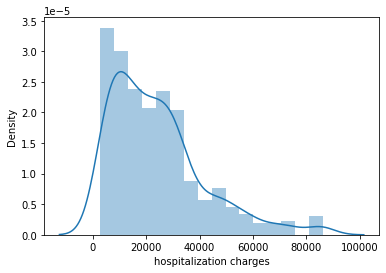

In [68]:
sns.distplot(data['hospitalization charges'].sample(499))

d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

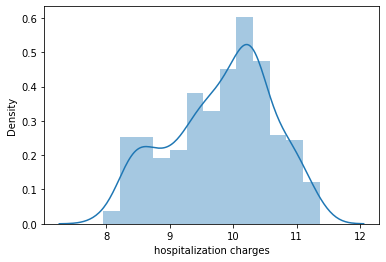

In [69]:
sns.distplot(np.log(data['hospitalization charges'].sample(499)))

###### Leven's Test:

In [ ]:
# H0: All the variances are equal
# H1: At least one variance is different from the rest

In [70]:
data_f=data[data['sex']=='female']
an_var1 = data_f[data_f['severity level']==0]['viral load']
an_var2 = data_f[data_f['severity level']==1]['viral load']
an_var3 = data_f[data_f['severity level']==2]['viral load']

In [71]:
from scipy.stats import levene
statistic, p_value = levene(an_var1, an_var2, an_var3)
print('The p-value is', p_value)

The p-value is 0.3645585716859747


#### setting up Null Hypothesis and Alternate Hypothesis for season - ANOVA
##### H0 : mean of all the severity levels are equal

##### H1 : mean of all the severity levels are not equal

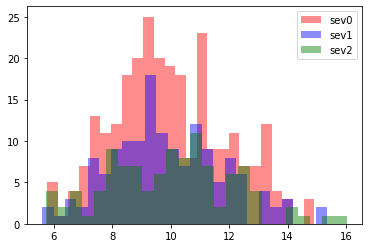

F_onewayResult(statistic=0.07443469817375759, pvalue=0.9282779784079939)


In [61]:
plt.hist(an_var1, bins=25, alpha=0.45, color='red')
plt.hist(an_var2, bins=25, alpha=0.45, color='blue')
plt.hist(an_var3, bins=25, alpha=0.45, color='green')

plt.legend(['sev0', 'sev1', 'sev2'])
plt.show()
print(stats.f_oneway(an_var1, an_var2, an_var3))

### proportion of smoking significantly different across different regions

#### Setting up Null Hypothesis and Alternate Hypothesis
##### H0 : region and smoker are independent

##### H1 : region and smoker are dependent

In [55]:
# Observed data for chi square test
observed = pd.crosstab(data['region'], data['smoker'], margins=True)

In [56]:
observed

smoker,no,yes,All
region,,,
northeast,257,39,296
northwest,267,38,305
southeast,272,35,307
southwest,265,26,291
All,1061,138,1199


In [57]:
# Test statistics, pvalue and degree of freedom
# Expected values to be compare with Observed for test statistics and pvalue of chi-square test.
stats.chi2_contingency(observed= observed)

(2.9745627841799864,
 0.9359437015231419,
 8,
 array([[ 261.93160967,   34.06839033,  296.        ],
        [ 269.89574646,   35.10425354,  305.        ],
        [ 271.66555463,   35.33444537,  307.        ],
        [ 257.50708924,   33.49291076,  291.        ],
        [1061.        ,  138.        , 1199.        ]]))